In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# id : 선수 고유의 아이디
# name : 이름
# age : 나이
# continent : 선수들의 국적이 포함되어 있는 대륙입니다
# contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다
# position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등
# prefer_foot : 선수가 선호하는 발입니다. ex) 오른발
# reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수
# stat_overall : 선수의 현재 능력치 입니다.
# stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.
# stat_skill_moves : 선수의 개인기 능력치 입니다.
# value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다


In [3]:
train = pd.read_csv('FIFA_train.csv')
test = pd.read_csv('FIFA_test.csv')

In [4]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [5]:
test.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [7]:
train.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


In [8]:
train["continent"].value_counts()

europe           5322
south america    1927
asia              787
africa            721
oceania           175
Name: continent, dtype: int64

In [9]:
train["position"].value_counts()

MF    3428
DF    2791
ST    1705
GK    1008
Name: position, dtype: int64

In [10]:
train["prefer_foot"].value_counts()

right    6837
left     2095
Name: prefer_foot, dtype: int64

In [11]:
train["contract_until"].value_counts()

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

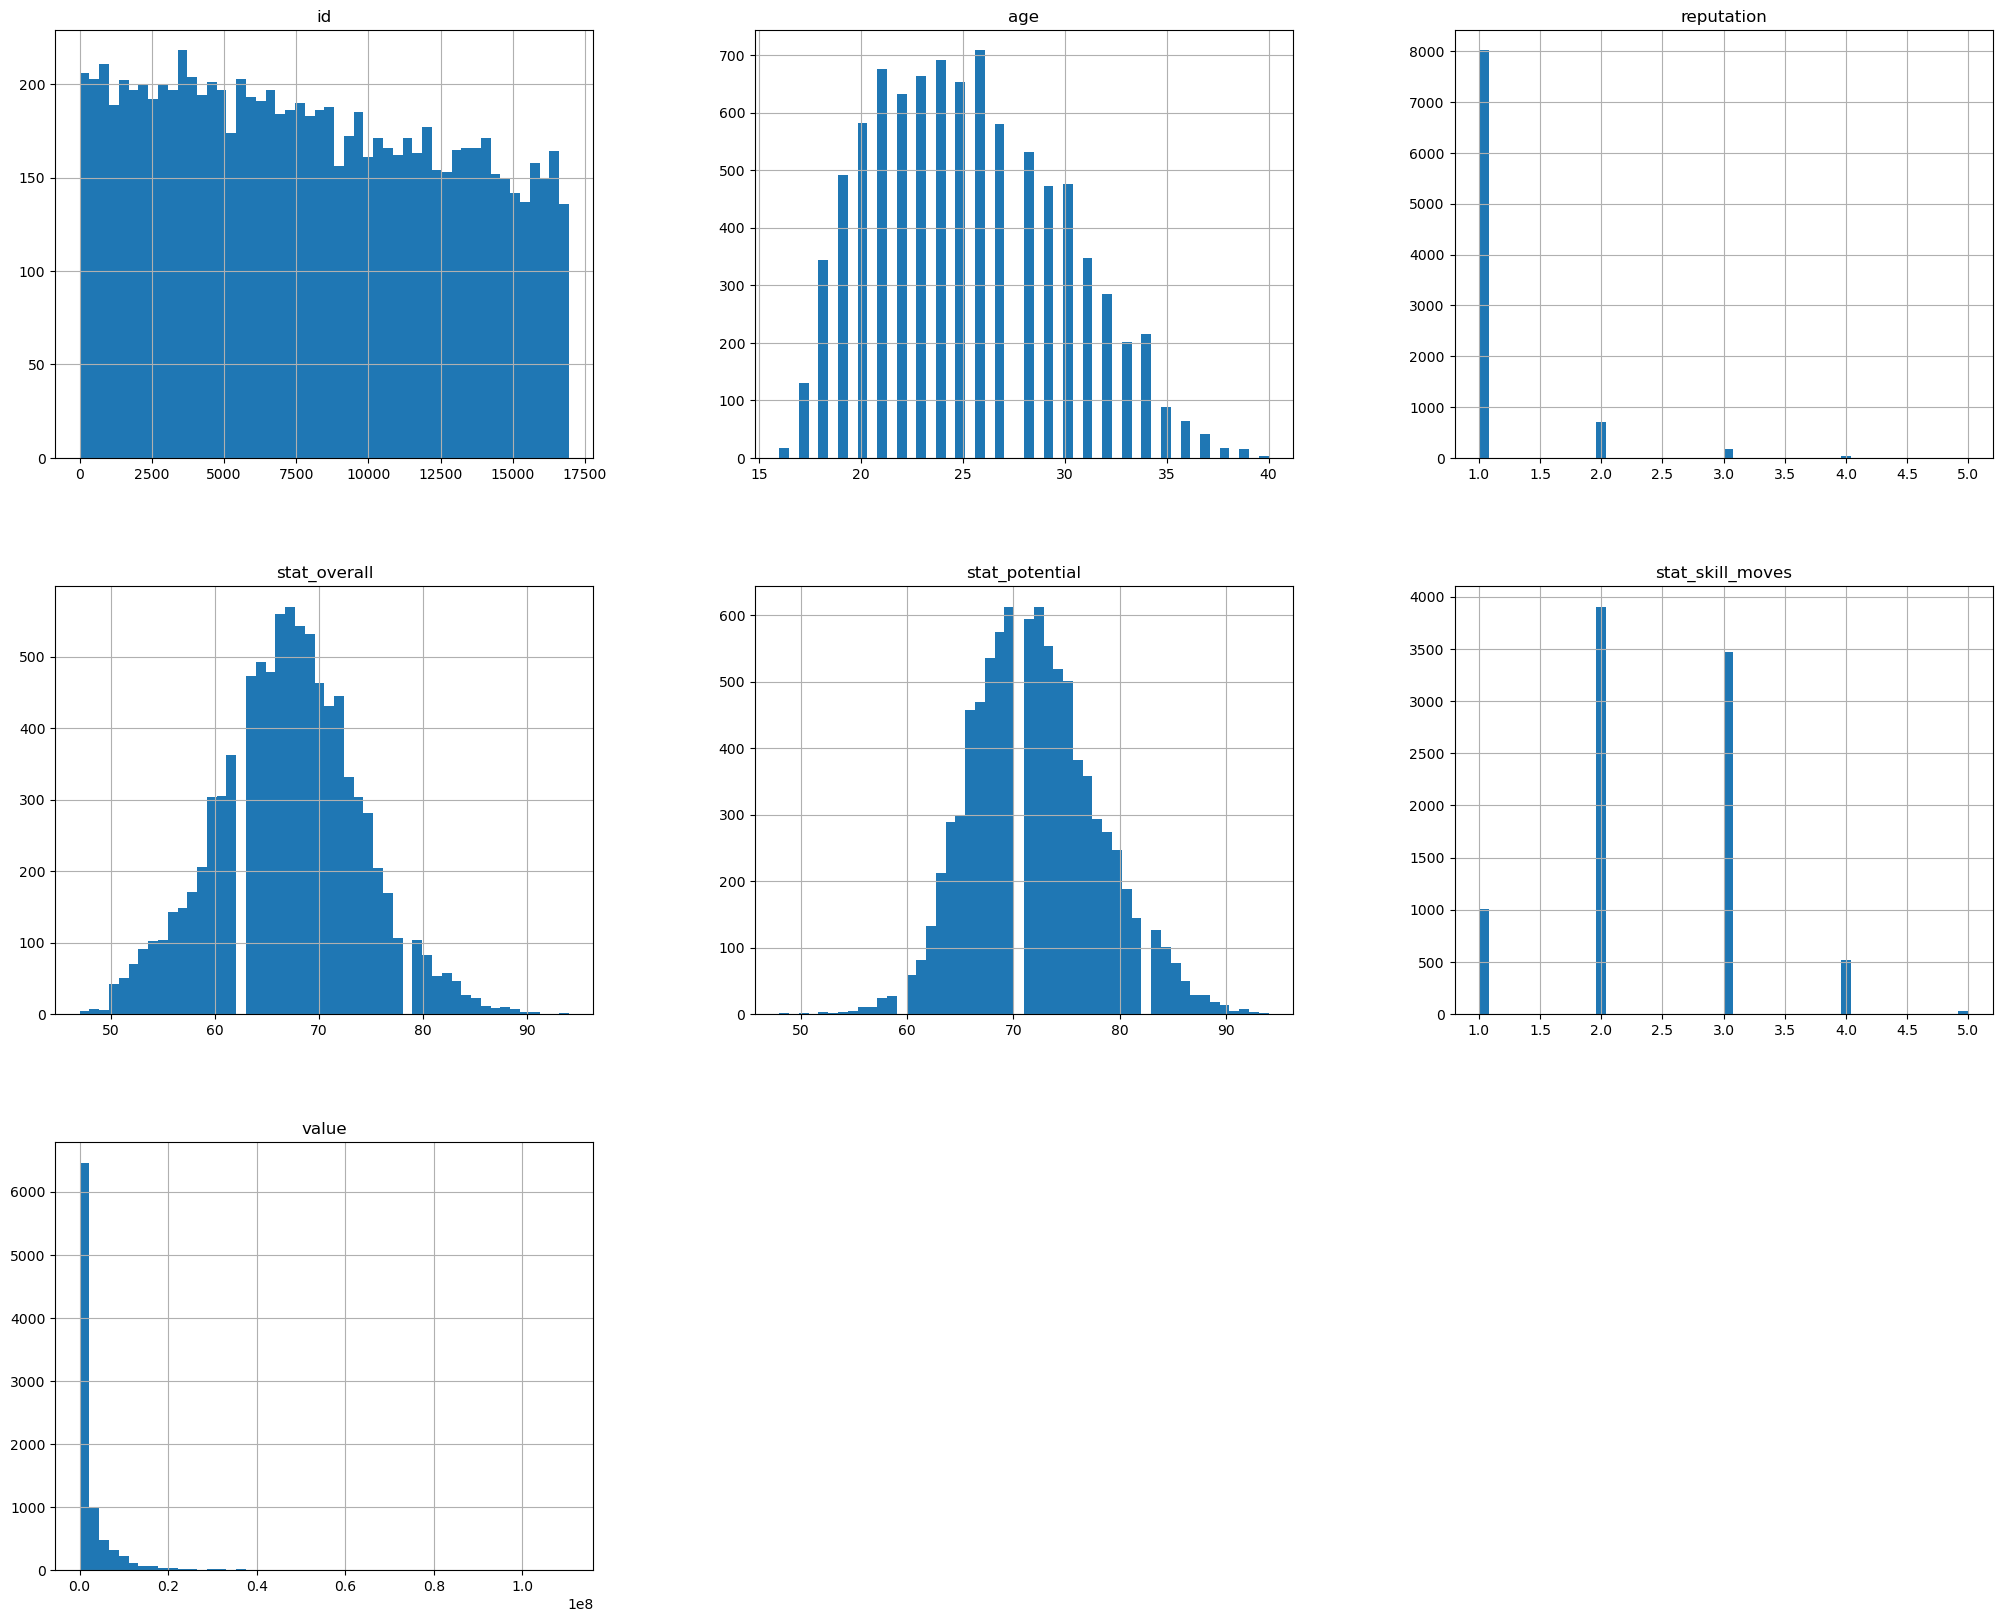

In [12]:
%matplotlib inline    
import matplotlib.pyplot as plt    
train.hist(bins=50, figsize=(25,20)) 
plt.show() 

In [13]:
train.drop(['id', 'name'], axis = 1, inplace = True)
test.drop(['id', 'name'], axis = 1, inplace = True)

In [14]:
train.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [15]:
test.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,33,europe,2022,ST,right,5.0,94,94,5.0
1,26,south america,2022,ST,right,5.0,92,93,5.0
2,27,europe,2023,MF,right,4.0,91,92,4.0
3,27,europe,2020,ST,right,4.0,91,91,4.0
4,32,europe,2020,MF,right,4.0,91,91,4.0


<AxesSubplot:>

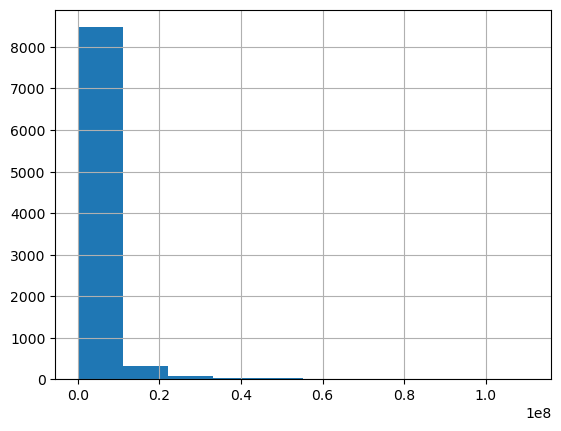

In [16]:
train["value"].hist()

<AxesSubplot:>

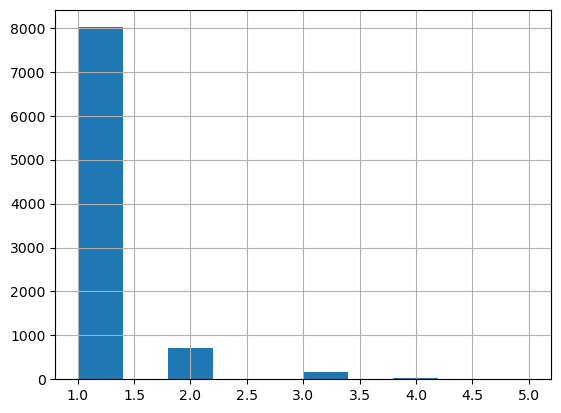

In [17]:
train["reputation"].hist()

<AxesSubplot:>

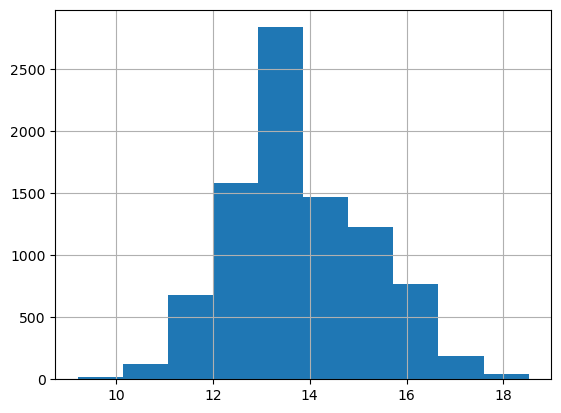

In [18]:
train["value_log"] = np.log(train["value"]+1)
train["value_log"].hist()

<AxesSubplot:>

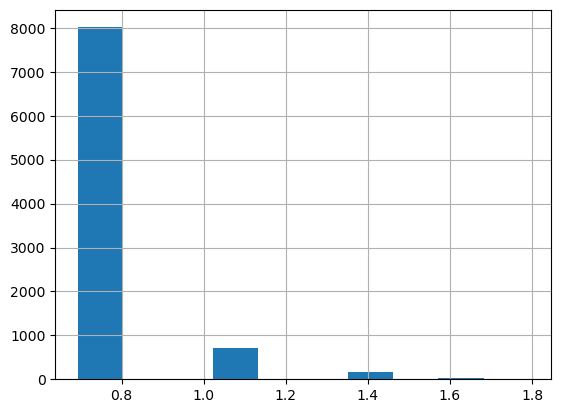

In [19]:
train["reputation_log"] = np.log(train["reputation"]+1)
train["reputation_log"].hist()
# 왜 로그화를 했는데 정규분포로 변환이 안돼?

In [20]:
train.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,value_log,reputation_log
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,18.520526,1.791759
1,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,18.092177,1.609438
2,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,18.197537,1.791759
3,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,17.747336,1.609438
4,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,18.035018,1.386294


<AxesSubplot:>

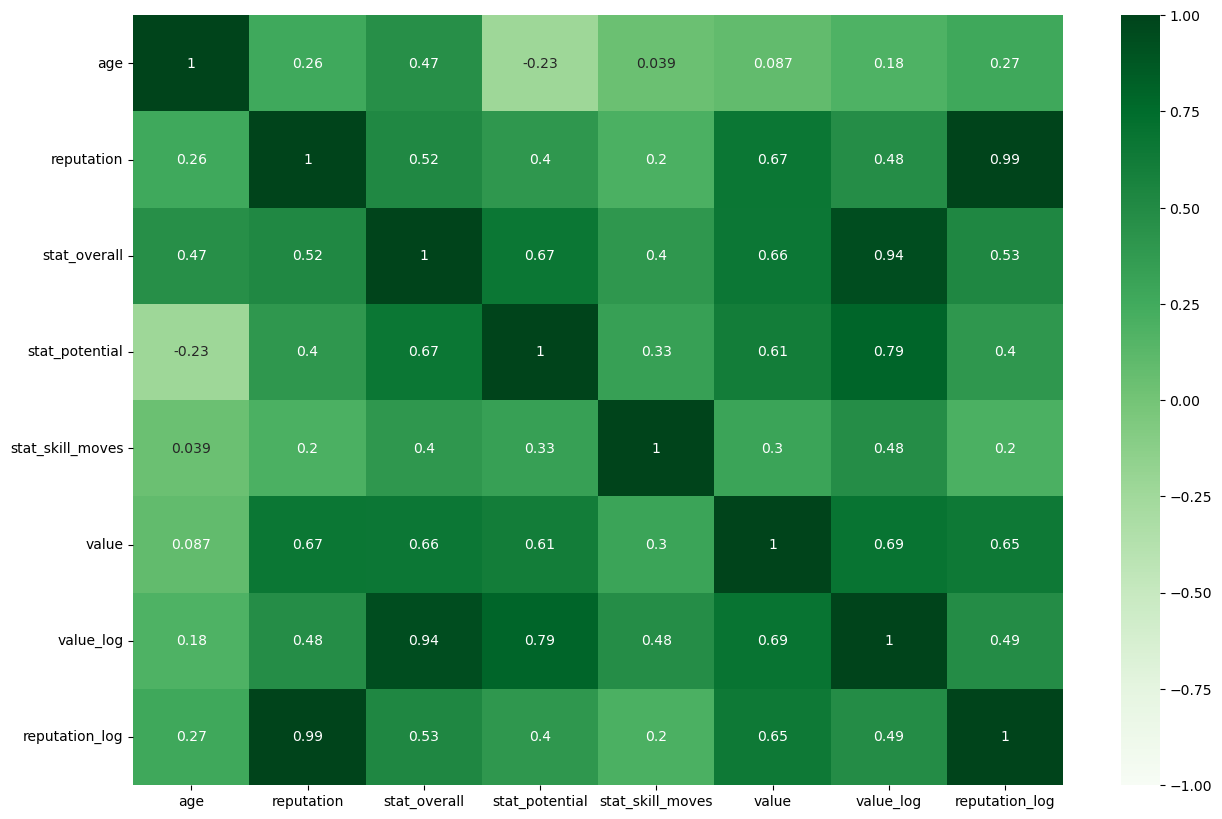

In [21]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams["figure.figsize"] = (15,10)
sb.heatmap(train.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [22]:
파생변수1 = train["age"] * train["stat_overall"]
파생변수1

0       2914
1       2457
2       2821
3       2912
4       2250
        ... 
8927     864
8928     893
8929     846
8930     846
8931     893
Length: 8932, dtype: int64

In [23]:
파생변수2 =  train["reputation"] * train["stat_overall"]
파생변수2

0       470.0
1       364.0
2       455.0
3       364.0
4       270.0
        ...  
8927     48.0
8928     47.0
8929     47.0
8930     47.0
8931     47.0
Length: 8932, dtype: float64

In [24]:
파생변수3 = train["stat_skill_moves"] * train["stat_overall"]
파생변수3

0       376.0
1        91.0
2       273.0
3       273.0
4        90.0
        ...  
8927    144.0
8928     94.0
8929     94.0
8930     47.0
8931     94.0
Length: 8932, dtype: float64

In [25]:
파생변수4 =  train["stat_potential"] * train["stat_overall"]
파생변수4

0       8836
1       8463
2       8281
3       8281
4       8370
        ... 
8927    3024
8928    2773
8929    3008
8930    3055
8931    2961
Length: 8932, dtype: int64

In [26]:
train1 = pd.concat([train, 파생변수1, 파생변수2, 파생변수3, 파생변수4], axis=1 )
train1.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,value_log,reputation_log,0,1,2,3
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,18.520526,1.791759,2914,470.0,376.0,8836
1,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,18.092177,1.609438,2457,364.0,91.0,8463
2,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,18.197537,1.791759,2821,455.0,273.0,8281
3,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,17.747336,1.609438,2912,364.0,273.0,8281
4,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,18.035018,1.386294,2250,270.0,90.0,8370


In [28]:
train1.columns = ["age","continent","contract_until","position","prefer_foot","reputation","stat_overall","stat_potential","stat_skill_moves","value","value_log","reputation_log","age x stat_overall","reputation x stat_overall","stat_skill_moves x stat_overall","stat(potential x overall)"]
train1

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,value_log,reputation_log,age x stat_overall,reputation x stat_overall,stat_skill_moves x stat_overall,stat(potential x overall)
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,18.520526,1.791759,2914,470.0,376.0,8836
1,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,18.092177,1.609438,2457,364.0,91.0,8463
2,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,18.197537,1.791759,2821,455.0,273.0,8281
3,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,17.747336,1.609438,2912,364.0,273.0,8281
4,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,18.035018,1.386294,2250,270.0,90.0,8370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0,11.002117,0.693147,864,48.0,144.0,3024
8928,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0,10.596660,0.693147,893,47.0,94.0,2773
8929,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0,10.819798,0.693147,846,47.0,94.0,3008
8930,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0,10.819798,0.693147,846,47.0,47.0,3055


In [29]:
corr_matrix= train1.corr()
corr_matrix

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value,value_log,reputation_log,age x stat_overall,reputation x stat_overall,stat_skill_moves x stat_overall,stat(potential x overall)
age,1.000000,0.263468,0.467345,-0.231303,0.039362,0.087319,0.184635,0.271397,0.932467,0.310434,0.145037,0.167173
reputation,0.263468,1.000000,0.521389,0.399183,0.196582,0.665982,0.480683,0.993232,0.434315,0.985633,0.322936,0.536051
stat_overall,0.467345,0.521389,1.000000,0.665453,0.400164,0.658444,0.938548,0.528155,0.748252,0.647555,0.597578,0.930102
stat_potential,-0.231303,0.399183,0.665453,1.000000,0.332578,0.611907,0.793474,0.399242,0.106133,0.483738,0.460806,0.889177
stat_skill_moves,0.039362,0.196582,0.400164,0.332578,1.000000,0.298500,0.476796,0.202778,0.185513,0.245072,0.969026,0.401463
value,0.087319,0.665982,0.658444,0.611907,0.298500,1.000000,0.694398,0.645199,0.339994,0.739758,0.453934,0.732745
value_log,0.184635,0.480683,0.938548,0.793474,0.476796,0.694398,1.000000,0.488388,0.514806,0.601412,0.652207,0.956842
reputation_log,0.271397,0.993232,0.528155,0.399242,0.202778,0.645199,0.488388,1.000000,0.442059,0.975391,0.329716,0.538782
age x stat_overall,0.932467,0.434315,0.748252,0.106133,0.185513,0.339994,0.514806,0.442059,1.000000,0.517012,0.344908,0.503232
reputation x stat_overall,0.310434,0.985633,0.647555,0.483738,0.245072,0.739758,0.601412,0.975391,0.517012,1.000000,0.394750,0.652360


In [30]:
corr_matrix["value_log"].sort_values(ascending=False)

value_log                          1.000000
stat(potential x overall)          0.956842
stat_overall                       0.938548
stat_potential                     0.793474
value                              0.694398
stat_skill_moves x stat_overall    0.652207
reputation x stat_overall          0.601412
age x stat_overall                 0.514806
reputation_log                     0.488388
reputation                         0.480683
stat_skill_moves                   0.476796
age                                0.184635
Name: value_log, dtype: float64

In [37]:
train2 = train1.drop("reputation", axis=1)
train2.head()

,age,continent,contract_until,position,prefer_foot,stat_overall,stat_potential,stat_skill_moves,value,value_log,reputation_log,age x stat_overall,reputation x stat_overall,stat_skill_moves x stat_overall,stat(potential x overall)
0,31,south america,2021,ST,left,94,94,4.0,110500000.0,18.520526,1.791759,2914,470.0,376.0,8836
1,27,europe,2020,GK,right,91,93,1.0,72000000.0,18.092177,1.609438,2457,364.0,91.0,8463
2,31,south america,2021,ST,right,91,91,3.0,80000000.0,18.197537,1.791759,2821,455.0,273.0,8281
3,32,europe,2020,DF,right,91,91,3.0,51000000.0,17.747336,1.609438,2912,364.0,273.0,8281
4,25,europe,2021,GK,right,90,93,1.0,68000000.0,18.035018,1.386294,2250,270.0,90.0,8370


In [39]:
train3 = train2.drop("value", axis=1)
train3.head()

,age,continent,contract_until,position,prefer_foot,stat_overall,stat_potential,stat_skill_moves,value_log,reputation_log,age x stat_overall,reputation x stat_overall,stat_skill_moves x stat_overall,stat(potential x overall)
0,31,south america,2021,ST,left,94,94,4.0,18.520526,1.791759,2914,470.0,376.0,8836
1,27,europe,2020,GK,right,91,93,1.0,18.092177,1.609438,2457,364.0,91.0,8463
2,31,south america,2021,ST,right,91,91,3.0,18.197537,1.791759,2821,455.0,273.0,8281
3,32,europe,2020,DF,right,91,91,3.0,17.747336,1.609438,2912,364.0,273.0,8281
4,25,europe,2021,GK,right,90,93,1.0,18.035018,1.386294,2250,270.0,90.0,8370


In [40]:
X = train3.drop("value_log", axis=1)
y = train3["value_log"].copy()

In [41]:
X

,age,continent,contract_until,position,prefer_foot,stat_overall,stat_potential,stat_skill_moves,reputation_log,age x stat_overall,reputation x stat_overall,stat_skill_moves x stat_overall,stat(potential x overall)
0,31,south america,2021,ST,left,94,94,4.0,1.791759,2914,470.0,376.0,8836
1,27,europe,2020,GK,right,91,93,1.0,1.609438,2457,364.0,91.0,8463
2,31,south america,2021,ST,right,91,91,3.0,1.791759,2821,455.0,273.0,8281
3,32,europe,2020,DF,right,91,91,3.0,1.609438,2912,364.0,273.0,8281
4,25,europe,2021,GK,right,90,93,1.0,1.386294,2250,270.0,90.0,8370
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,18,africa,2019,MF,right,48,63,3.0,0.693147,864,48.0,144.0,3024
8928,19,europe,2020,DF,right,47,59,2.0,0.693147,893,47.0,94.0,2773
8929,18,south america,2021,DF,right,47,64,2.0,0.693147,846,47.0,94.0,3008
8930,18,europe,2021,GK,right,47,65,1.0,0.693147,846,47.0,47.0,3055


In [42]:
y

0       18.520526
1       18.092177
2       18.197537
3       17.747336
4       18.035018
          ...    
8927    11.002117
8928    10.596660
8929    10.819798
8930    10.819798
8931    11.002117
Name: value_log, Length: 8932, dtype: float64

수치형변수와 범주형 변수를 분리 

In [43]:
X_num = X.select_dtypes(include=[np.number])

수치형변수를 표준화시켜줌

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_num)
scaler.transform(X_num)

array([[ 1.2493085 ,  3.9257078 ,  3.67459771, ..., 10.26948999,
         3.42471193,  4.78437129],
       [ 0.38635718,  3.48804079,  3.50759178, ...,  7.49687631,
        -1.16328005,  4.33579667],
       [ 1.2493085 ,  3.48804079,  3.17357994, ...,  9.877139  ,
         1.76659553,  4.11692112],
       ...,
       [-1.5552833 , -2.93107538, -1.33557993, ..., -0.794808  ,
        -1.1149854 , -2.22445675],
       [-1.5552833 , -2.93107538, -1.16857401, ..., -0.794808  ,
        -1.87160162, -2.16793395],
       [-1.33954546, -2.93107538, -1.50258585, ..., -0.794808  ,
        -1.1149854 , -2.28097956]])

In [54]:
X_cat = X[["continent","position","prefer_foot","contract_until"]] #꺽쇠를 1개를 하게 되면 데이터프레임 구조가 아닌 시리즈 구조로나타내게 됨
# type(X_cat)
X_cat.head(10)

,continent,position,prefer_foot,contract_until
0,south america,ST,left,2021
1,europe,GK,right,2020
2,south america,ST,right,2021
3,europe,DF,right,2020
4,europe,GK,right,2021
5,south america,DF,right,2019
6,europe,MF,left,2020
7,europe,MF,right,2023
8,europe,GK,right,2022
9,europe,GK,left,2024


In [50]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
X_cat_1hot = cat_encoder.fit_transform(X_cat)
X_cat_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])